# Analysis of 911 Calls Location Map in Montgomery County, PA

Language: Python;
Tools: Pandas, Seaborn

- - -
## Dataset

Emergency - 911 Calls in Montgomery County, PA,

Available at the [kaggle website](https://www.kaggle.com/mchirico/montcoalert)

Using Version 43 (2015-12-10 to 2017-05-29)


In [4]:
import numpy as np
import pandas as pd
df = pd.read_csv('911.csv')
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


#### Columns description provided at the kaggle website: 

lat : String variable, Latitude  

lng: String variable, Longitude 

title: String variable, Title 

- - - - - - - - - - - - - - - 
## Prepare a DataFrame with information of interest:
lat, lng, reason of call

In [5]:
df1=df[['lat','lng','title']].copy()
df1['title']=df1['title'].apply(lambda s: s.split(':')[0])
df1.head()

,lat,lng,title
0,40.297876,-75.581294,EMS
1,40.258061,-75.264680,EMS
2,40.121182,-75.351975,Fire
3,40.116153,-75.343513,EMS
4,40.251492,-75.603350,EMS


#### Prepare a scatter plot

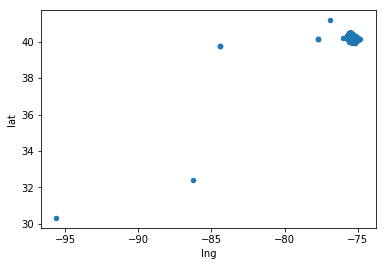

In [6]:
%matplotlib inline
df1.plot.scatter(x='lng',y='lat')

#### Several calls were received outside of the county.

#### Let us check the plot without most of obvious outliers:

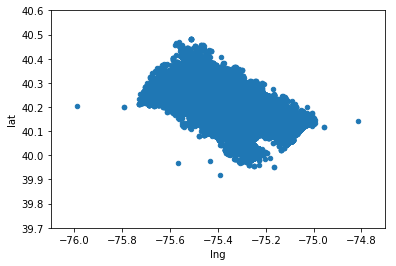

In [7]:
df1.plot.scatter(x='lng',y='lat', xlim=(-76.1,-74.7), ylim=(39.7,40.6))

#### Now one can see a countour of a county. Let us concentrate on the space within the countour:

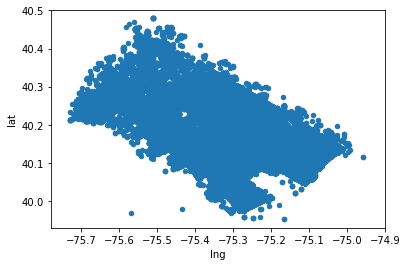

In [8]:
df1.plot.scatter(x='lng',y='lat', xlim=(-75.78,-74.90), ylim=(39.93,40.50))

#### Let us check a number of outliers that are not in the plot above

In [9]:
df1[(df1['lat']<39.93) | (df1['lat']>40.50) | (df1['lng']<-75.78) | (df1['lng']>-74.90)]

,lat,lng,title
5454,40.160004,-77.686813,Traffic
8313,41.167156,-76.874030,EMS
16713,40.160004,-77.686813,Traffic
25529,32.387090,-86.276106,Traffic
56937,39.745533,-84.395256,Fire
66737,30.333596,-95.595595,EMS
88048,39.745533,-84.395256,Fire
135726,40.160004,-77.686813,Traffic
147405,39.745533,-84.395256,Fire
155564,40.205247,-75.989593,Traffic


There are 14 outliers which are not shown in the plot above

#### Now, preparing a new DataFrame, without these outliers:

In [21]:
df2 = df1[(df1['lat']>39.93) & (df1['lat']<40.50) & (df1['lng']>-75.78) & (df1['lng']<-74.90)]

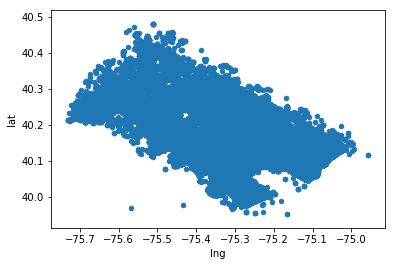

In [11]:
df2.plot.scatter(x='lng',y='lat')

- - - 
## Convert (lng,lat) degrees to (x,y) miles

#### Let bottom left corner be an origin of a new coordinate system

In [12]:
lat0 = df2['lat'].min()
lng0 = df2['lng'].min()
print ('lat0={}, lng0={}'.format(lat0,lng0))

lat0=39.9525839, lng0=-75.7297893


#### Now transforming degrees to miles using information from [longitudestore](http://www.longitudestore.com/how-big-is-one-gps-degree.html)

at latitude 40 degrees,

one degree of latitude = 68.99 miles

one degree of longitude = 53.06 miles

In [24]:
df2['x']=df2['lng'].apply(lambda l: (l-lng0)*53.06)
df2['y']=df2['lat'].apply(lambda l: (l-lat0)*68.99)

/home/ekaterina/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/ekaterina/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [25]:
df2.head()

,lat,lng,title,x,y
0,40.297876,-75.581294,EMS,7.879187,23.821695
1,40.258061,-75.264680,EMS,24.678705,21.074893
2,40.121182,-75.351975,Fire,20.046816,11.631569
3,40.116153,-75.343513,EMS,20.495820,11.284632
4,40.251492,-75.603350,EMS,6.708885,20.621670


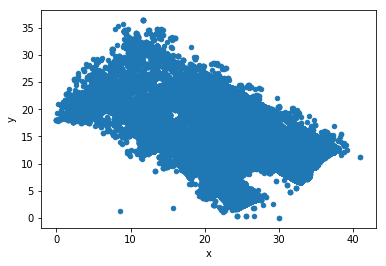

In [26]:
df2.plot.scatter(x='x',y='y')

#### Now checking a number of calls by cathegory

In [28]:
import seaborn as sns

In [31]:
df3_EMS = df2[['x','y']][df2['title']=='EMS']
df4_Fire = df2[['x','y']][df2['title']=='Fire']
df5_Traffic = df2[['x','y']][df2['title']=='Traffic']

In [37]:
pt_EMS = df2[df2['title']=='EMS'].pivot_table(index='x',columns='y')

MemoryError: 

y,0.0,0.269971668,0.40269463,1.087254804,1.195051679,1.24078515,1.278129437,1.410824803,1.427023655,1.446126986,...,34.571482314,34.578208839,34.623549067,34.722218565,34.74212218,34.766344569,34.821985004,35.290992822,35.716060909,36.376309007
x,29.955967,25.560323,24.326779,22.447251,8.549149,22.554034,22.499934,23.626891,22.241733,22.726755,...,12.352978,14.31623,12.421839,9.60958,13.629485,14.152328,7.892447,8.287203,8.959897,11.618792
